## Machine Learning Second Home Assignment
Group number: 14

#### Import libraries and dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [2]:
# Import dataset
df = pd.read_csv("Postures.csv", na_values = "?")

### Step 0. Pre-processing the data

#### 0.1 Examining dataset

In [3]:
# Dataset shape
df.shape

(78096, 38)

In [4]:
# Dataset basic descriptive statistics
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
count,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,...,30564.000000,23968.000000,23968.000000,23968.000000,14753.000000,14753.000000,14753.000000,32.000000,32.000000,32.000000
mean,2.983738,7.959127,50.345664,85.812051,-29.984712,49.595209,86.192647,-29.509202,48.612121,83.771315,...,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271
std,1.421183,4.697810,32.696173,40.204363,34.361918,32.478238,40.453214,34.764398,33.605390,41.023543,...,35.736347,39.970672,42.676118,36.250738,38.461088,42.915225,39.677816,49.754171,36.538582,19.655609
min,0.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,...,-142.654497,-99.231688,-64.734284,-113.397327,-80.196289,-65.019295,-112.668930,-96.951690,-65.432143,-48.274677
25%,2.000000,5.000000,29.295062,63.494432,-56.356438,28.755137,64.154529,-57.360107,25.170006,58.052385,...,-52.521279,26.113866,44.034191,-55.618297,20.406693,37.697395,-62.953012,-62.608867,21.795335,-3.829163
50%,3.000000,9.000000,54.619964,86.526246,-30.864125,54.215514,87.542751,-30.184005,53.814580,86.458324,...,-22.457956,61.992034,84.738571,-26.796695,61.843506,78.987241,-32.909286,-48.524085,38.748102,11.205787
75%,4.000000,12.000000,72.488686,113.107355,-1.418803,71.762039,116.219398,-0.366692,71.561951,106.660827,...,6.415435,83.766641,115.555248,3.064292,83.054781,100.947816,6.060066,0.645542,40.702633,12.789386
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,...,119.213101,174.054403,167.942588,123.380512,149.486224,168.352478,108.455548,84.683328,127.945490,18.062286


#### 0.2 Eliminate first row, transform "User" variable into cathegorical and check if the dependent variable "Class" contains no missing values

In [5]:
# Eliminate the first row of the data set as there are only Zeros
df = df.tail(-1)

In [6]:
#  Transform "User" variable into cathegorical
df['User'] = pd.Categorical(df.User)

In [7]:
# Check whether the dependent variable "Class" contains missing values
df[df['Class'].isna()]

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11


### Step 1. Split the data set into a training and testing set

+ Before setting up the training and testing sets, we split the dataset into a TRAIN Set and an Independent Validation Set (IVS)

In [8]:
# Splitting the dataset into TRAIN set (train and test) and an IVS (Independent Validation Set)
X = df.drop(columns=['Class']) 
y = df['Class']
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(X, y, test_size = 0.25, random_state = 4)

In [9]:
# Print the number of instances in each class
vals, counts= np.unique(y_TRAIN, return_counts=True)
for v, c in zip(vals, counts):
    print("Nr. of instances in class ", v, "--->", c)

Nr. of instances in class  1 ---> 12202
Nr. of instances in class  2 ---> 11225
Nr. of instances in class  3 ---> 12159
Nr. of instances in class  4 ---> 11118
Nr. of instances in class  5 ---> 11867


+ Next we split the TRAIN into a training and testing sets for Simple Cross Validation. The same data partition, testing = 25%, is used for evaluating all models.

In [10]:
# Splitting the data set into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_TRAIN, y_TRAIN, test_size = 0.25, random_state = 4)

### Step 2. Scale the data

In [11]:
# Scale the data using StandardScaler
columns = list(X_train.columns.values)
scaler   = StandardScaler()
scaler.fit(X_train)
Xt_train = pd.DataFrame(scaler.transform(X_train), columns = columns)
Xt_test  = pd.DataFrame(scaler.transform(X_test), columns = columns)

### Step 3. Dealing with missing values

#### 3.1 Dropping columns with more than 50% of missing values

In [12]:
# Define cutoff point
threshold = 0.5

# Calculate % of missing values
columns = list(Xt_train.columns.values)
missing = Xt_train.isna().sum()/ len(Xt_train)
missing.index = columns

# Determine variables to drop
elim_var = missing.loc[missing > threshold]
elim_var_names = list(elim_var.index.values)

# Drop variables with % missing values > threshold
Xt_train = Xt_train.drop(columns = elim_var_names, axis = 1)
Xt_test = Xt_test.drop(columns = elim_var_names, axis = 1)

#### 3.2 Imputation of missing values

We perform a multivariate imputation with KNN, where for each feature with missing values a model is generated using all the other available features

In [13]:
# Perform a multivariate imputation with KNN
imputer = KNNImputer(n_neighbors = 2, weights = "uniform")
imputer.fit(Xt_train)
Xtt_train = imputer.transform(Xt_train)
Xtt_test  = imputer.transform(Xt_test)

### Step 4. Fitting the models

#### 4.1 Linear models

##### 4.1.1 Logistic Regression

In [14]:
# Create an empty list to store the results
res_lr = []

# Define a list of hyperparameters to test
c_range = [0.0001, 0.001, 0.01, 0.1, 1]

# Loop through the hyperparameter combinations and calculate Accuracy and MCC for each model
for C in c_range:
    model_name_lr = f'Logistic Regression (L2) (C={C})'
    if not any(result_lr['Model Name'] == model_name_lr for result_lr in res_lr):
        model_lr = LogisticRegression(max_iter = 100000, C = C, random_state = 4)
        model_lr = model_lr.fit(Xtt_train, y_train)
        preds_lr = model_lr.predict(Xtt_test)
        res_lr.append({'Model Name': model_name_lr, 'Accuracy': accuracy_score(y_test, preds_lr), 'MCC': matthews_corrcoef(y_test, preds_lr)})

##### 4.1.2 Linear Discriminant Analysis

In [16]:
# Create an empty list to store the results
res_lda = []

# Define a list of hyperparameters to test
solver = ["svd", "lsqr", "eigen"]

# Loop through the hyperparameter combinations and calculate Accuracy and MCC for each model
for solver in solver:
    model_name_lda = f'Linear Discriminant Analyss (solver={solver})'
    if not any(result_lda['Model Name'] == model_name_lda for result_lda in res_lda):
        model_lda = LinearDiscriminantAnalysis(solver = solver)
        model_lda = model_lda.fit(Xtt_train, y_train)
        preds_lda = model_lda.predict(Xtt_test)
        res_lda.append({'Model Name': model_name_lda, 'Accuracy': accuracy_score(y_test, preds_lda), 'MCC': matthews_corrcoef(y_test, preds_lda)})

##### 4.1.3 Quadratic Discriminant Analysis

In [17]:
# Create an empty DataFrame to store the results
res_qda = []

# Calculate Accuracy and MCC for the model
model_name_qda = f' Quadratic Discriminant Analysis '
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(Xtt_train, y_train)
preds_qda = model_qda.predict(Xtt_test)
res_qda.append({'Model Name': model_name_qda, 'Accuracy': accuracy_score(y_test, preds_qda), 'MCC': matthews_corrcoef(y_test, preds_qda)})

#### 4.2 Tree Based models

In [18]:
# Create an empty DataFrame to store the results
res_dt = []

# Define a list of hyperparameters to test
min_samples_leaf_range = [1, 5, 10]
max_depth_range = [10, 15, 20, 25]

# Loop through the models and calculate F1 and MCC for each
for msl in min_samples_leaf_range:
    for md in max_depth_range:
        model_name_dt = f'Decision Tree (msl={msl}, max_depth={md})'
        if not any(result_dt['Model Name'] == model_name_dt for result_dt in res_dt):
            model_dt = DecisionTreeClassifier(min_samples_leaf = msl, max_depth = md, random_state = 4)
            model_dt = model_dt.fit(Xtt_train, y_train)
            preds_dt = model_dt.predict(Xtt_test)
            res_dt.append({'Model Name': model_name_dt, 'Accuracy': accuracy_score(y_test, preds_dt), 'MCC': matthews_corrcoef(y_test, preds_dt)})

#### 4.3 Naive Bayes

In [19]:
# Create an empty DataFrame to store the results
res_nb = []

# Calculate Accuracy and MCC for the model
model_name_nb = f' Gaussian Naive Bayes '
model_nb = GaussianNB()
model_nb.fit(Xtt_train, y_train)
preds_nb = model_nb.predict(Xtt_test)
res_nb.append({'Model Name': model_name_nb, 'Accuracy': accuracy_score(y_test, preds_nb), 'MCC': matthews_corrcoef(y_test, preds_nb)})

#### 4.4 K-Nearest Neighbours

In [20]:
# Create an empty DataFrame to store the results
res_knn = []

# Define a list of hyperparameters to test
ks = np.array([1, 2, 3, 4, 5, 10, 15, 20, 30, 40])

# Loop through differente k's and calculate Accuracy and MCC for each model
for k in ks:
    model_name_knn = f'KNN (k={k})'
    if not any(result_knn['Model Name'] == model_name_knn for result_knn in res_knn):
        model_knn = KNeighborsClassifier(n_neighbors = k)
        model_knn.fit(Xtt_train, y_train)
        preds_knn = model_knn.predict(Xtt_test)
        res_knn.append({'Model Name': model_name_knn, 'Accuracy': accuracy_score(y_test, preds_knn), 'MCC': matthews_corrcoef(y_test, preds_knn)})

### Step 5. Assessing the quality of the models

#### 5.1 Linear models

##### 5.1.1 Logistic Regression

In [21]:
# Create a DataFrame from the list of logistic regression results
Best_lr = pd.DataFrame(res_lr)
Best_lr = Best_lr.sort_values(by="MCC", ascending=False)

# Examine Top 4 models
Best_lr[:4]

,Model Name,Accuracy,MCC
4,Logistic Regression (L2) (C=1),0.730588,0.663235
3,Logistic Regression (L2) (C=0.1),0.729973,0.662464
2,Logistic Regression (L2) (C=0.01),0.729222,0.661545
1,Logistic Regression (L2) (C=0.001),0.715427,0.644466


##### 5.1.2 Linear Discriminant Analysis

In [22]:
# Create a DataFrame from the list of logistic regression results
Best_lda = pd.DataFrame(res_lda)
Best_lda = Best_lda.sort_values(by="MCC", ascending=False)

# Examine Top 3 models
Best_lda[:3]

,Model Name,Accuracy,MCC
0,Linear Discriminant Analyss (solver=svd),0.712764,0.641084
1,Linear Discriminant Analyss (solver=lsqr),0.712764,0.641084
2,Linear Discriminant Analyss (solver=eigen),0.712764,0.641084


##### 5.1.3 Quadratic Discriminant Analysis

In [23]:
# Create a DataFrame from the list of results
Best_qda = pd.DataFrame(res_qda)
Best_qda = Best_qda.sort_values(by="MCC", ascending=False)

# Examine model result
Best_qda[:1]

,Model Name,Accuracy,MCC
0,Quadratic Discriminant Analysis,0.859865,0.825506


#### 5.2 Tree Based models

In [24]:
# Create a DataFrame from the list of results
Best_dt = pd.DataFrame(res_dt)
Best_dt = Best_dt.sort_values(by="MCC", ascending=False)

# Examine Top 4 models
Best_dt[:4]

,Model Name,Accuracy,MCC
3,"Decision Tree (msl=1, max_depth=25)",0.889230,0.861494
2,"Decision Tree (msl=1, max_depth=20)",0.887591,0.859433
1,"Decision Tree (msl=1, max_depth=15)",0.879123,0.848846
7,"Decision Tree (msl=5, max_depth=25)",0.870587,0.838185


#### 5.3 Naive Bayes

In [25]:
# Create a DataFrame from the list of results
Best_nb = pd.DataFrame(res_nb)
Best_nb = Best_nb.sort_values(by="MCC", ascending=False)

# Examine model result
Best_nb[:1]

,Model Name,Accuracy,MCC
0,Gaussian Naive Bayes,0.707642,0.635548


#### 5.4 K-Nearest Neighbours

In [26]:
# Create a DataFrame from the list of results
Best_knn = pd.DataFrame(res_knn)
Best_knn = Best_knn.sort_values(by="MCC", ascending=False)

# Examine model result
Best_knn[:4]

,Model Name,Accuracy,MCC
0,KNN (k=1),0.919006,0.898893
2,KNN (k=3),0.909855,0.887661
4,KNN (k=5),0.903025,0.879313
1,KNN (k=2),0.899133,0.875424


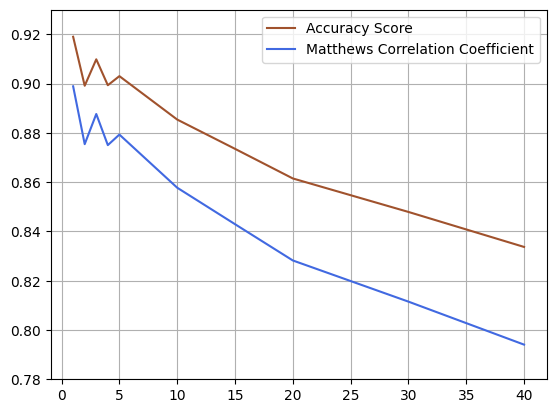

In [27]:
# Define a set of K neighbours
ks = np.array([1, 2, 3, 4, 5, 10, 15, 20, 30, 40])
accs = np.zeros(ks.shape[0])
mccs = np.zeros(ks.shape[0])

# Loop through differente k's and calculate Accuracy Score
for i,k in enumerate(ks):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(Xtt_train, y_train)
    preds_knn = model_knn.predict(Xtt_test)
    accs[i] = accuracy_score(y_test, preds_knn)
    mccs[i] = matthews_corrcoef(y_test, preds_knn)

# Plot results
plt.plot(ks, accs, color = "sienna", label = "Accuracy Score")
plt.plot(ks, mccs, color = "royalblue", label = "Matthews Correlation Coefficient")
plt.grid()
plt.legend(loc = "upper right")
plt.ylim(0.78,0.93)
plt.show()

#### 5.5 Select best model and fit the model with all the Training Set Data

List the classification models according to MCC

In [28]:
Best_Models = pd.concat([Best_lr[:4], Best_lda[:3], Best_qda[:1], Best_dt[:4], Best_nb[:1], Best_knn[:4]])
Best_Models = Best_Models.sort_values(by="MCC", ascending=False)
Best_Models[:10]

,Model Name,Accuracy,MCC
0,KNN (k=1),0.919006,0.898893
2,KNN (k=3),0.909855,0.887661
4,KNN (k=5),0.903025,0.879313
1,KNN (k=2),0.899133,0.875424
3,"Decision Tree (msl=1, max_depth=25)",0.889230,0.861494
2,"Decision Tree (msl=1, max_depth=20)",0.887591,0.859433
1,"Decision Tree (msl=1, max_depth=15)",0.879123,0.848846
7,"Decision Tree (msl=5, max_depth=25)",0.870587,0.838185
0,Quadratic Discriminant Analysis,0.859865,0.825506
4,Logistic Regression (L2) (C=1),0.730588,0.663235


Scale the TRAIN data

In [29]:
# Scale the data using StandardScaler
columns = list(X_TRAIN.columns.values)
scaler.fit(X_TRAIN)
Xt_TRAIN = pd.DataFrame(scaler.transform(X_TRAIN), columns = columns)

Dropping columns of the TRAIN data with more than 50% of missing values

In [31]:
# Drop variables with % missing values > threshold
Xt_TRAIN = Xt_TRAIN.drop(columns = elim_var_names, axis = 1)

Perform a multivariate imputation with KNN on the TRAIN data

In [33]:
# Perform a multivariate imputation with KNN
imputer.fit(Xt_TRAIN)
Xtt_TRAIN = imputer.transform(Xt_TRAIN)

Fit the best model with all the Training Set Data

In [34]:
# Select Best Model KNN (k=1)
k = 1
# Fit best model with all the Training Set Data
Best_Model = KNeighborsClassifier(n_neighbors = k)
Best_Model = Best_Model.fit(Xtt_TRAIN, y_TRAIN)

### Step 6. Use the IVS to assess the chosen model quality

Scale the data

In [35]:
# Scale the data using StandardScaler
columns = list(X_IVS.columns.values)
scaler.fit(X_IVS)
Xt_IVS = pd.DataFrame(scaler.transform(X_IVS), columns = columns)

Dropping columns with more than 50% of missing values

In [36]:
# Drop variables with % missing values > threshold
Xt_IVS = Xt_IVS.drop(columns=elim_var_names, axis = 1)

Perform a multivariate imputation with KNN

In [37]:
# Perform a multivariate imputation with KNN
imputer.fit(Xt_IVS)
Xtt_IVS = imputer.transform(Xt_IVS)

Assess the chosen model quality on the IVS data set 

In [39]:
ivs_preds = Best_Model.predict(Xtt_IVS)
print("These are the statistics for the selected Classification Model:")
print("The Accuracy score is: %7.4f" % accuracy_score(y_IVS, ivs_preds))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_IVS, ivs_preds))
print("This is the Confusion Matrix for the Independent Validation Set")
pd.DataFrame(confusion_matrix(y_IVS, ivs_preds))

These are the statistics for the selected Classification Model:
The Accuracy score is:  0.9283
The Matthews correlation coefficient is:  0.9105
This is the Confusion Matrix for the Independent Validation Set


,0,1,2,3,4
0,4026,10,24,1,2
1,16,3350,56,193,138
2,66,26,3844,219,30
3,20,90,173,3365,9
4,38,186,56,46,3540
